# Analysis

In [27]:
import matplotlib.pyplot as plt
import yt
from rich import print
import panel as pn

import logging
import json

In [29]:
pn.extension()

# load simulation parameters
with open("sim_parameters.json", "rb") as f:
    sim = json.load(f)

ytLogger = logging.getLogger("yt")
ytLogger.setLevel(logging.WARNING)

In [3]:
sim['time_norm'] / sim['dt_norm']

25600.0

In [4]:
zaxis = "y"  # yt will load the z axis as the y axis

### yt

In [5]:
ts = yt.load('./diags/diag1??????')
# ts = yt.load('./diags/diag???0032')

In [ ]:
def plot(ds, normalize = True, **kwargs):
    ad = ds.all_data()
    fields = ["Bx", "By", "Bz"]

    match sim["dim"]:
        case 1: pos = "x"
        case 2: pos = "y"
        
    pos = ad[pos]
    
    if normalize:
        pos = pos / sim['d_i']
    
    for field in fields:
        plt.plot(pos, ad[field], label=field, **kwargs)
    
    plt.xlabel("x ($d_i$)")
        
def hodogram(ds, comp1="By", comp2="Bz"):
    time = ds.current_time
    time_norm = time.value / sim['t_ci']
    ad = ds.all_data()
    plt.plot(ad[comp1], ad[comp2], label=f"t={time_norm:.2f}")
    plt.xlabel(comp1)
    plt.ylabel(comp2)

In [ ]:
for i, ds in enumerate(ts):
    alpha = (i + 1) / (len(ts)+1)
    plot(ds, alpha=alpha)
    plt.show()  # Show each plot separately

In [ ]:
i = 4
_ts = ts[0:i]
for i, ds in enumerate(_ts):
    alpha = (i + 1) / (len(_ts)+1)
    plot(ds, alpha=alpha)
    plt.show()  # Show each plot separately

In [ ]:
for ds in ts:
    hodogram(ds)
    plt.legend()

In [ ]:
i = 5
for ds in ts[0:i]:
    hodogram(ds)
    plt.legend()

In [ ]:
yt.SlicePlot(ds, "z", ("boxlib", "Bz"))

## Fields

In [6]:
ts = yt.load('./diags/diag1??????')
# ts = yt.load('./diags/diag???0032')

In [8]:
fields = [
    ("Bx"),
    ("By"),
    ("Bz"),
    ("mesh", "magnetic_field_strength"),
]

In [ ]:
for ds in ts.piter():
    p = yt.plot_2d(ds, fields=fields)
    p.set_log(fields, False)
    fig = p.export_to_mpl_figure((2, 2))
    fig.tight_layout()
    fig.savefig(f"figures/{ds}_magnetic_field.png")

### Average magnetic field

In [22]:
def plot_avg(ds):
    fields = [
        ("Bx"),
        ("By"),
        ("Bz"),
    ]

    ad = ds.all_data()
    df = ad.to_dataframe(fields + ["x", zaxis])
    # compute the magnetic field strength
    df = df.assign(B=lambda x: (x.Bx**2 + x.By**2 + x.Bz**2) ** 0.5)

    axes = df.groupby(zaxis).mean().plot(y=fields + ["B"], subplots=True)
    return axes[0].figure

BokehModel(combine_events=True, render_bundle={'docs_json': {'b2794ddf-cb6a-494d-a3a1-782bd542339e': {'version…

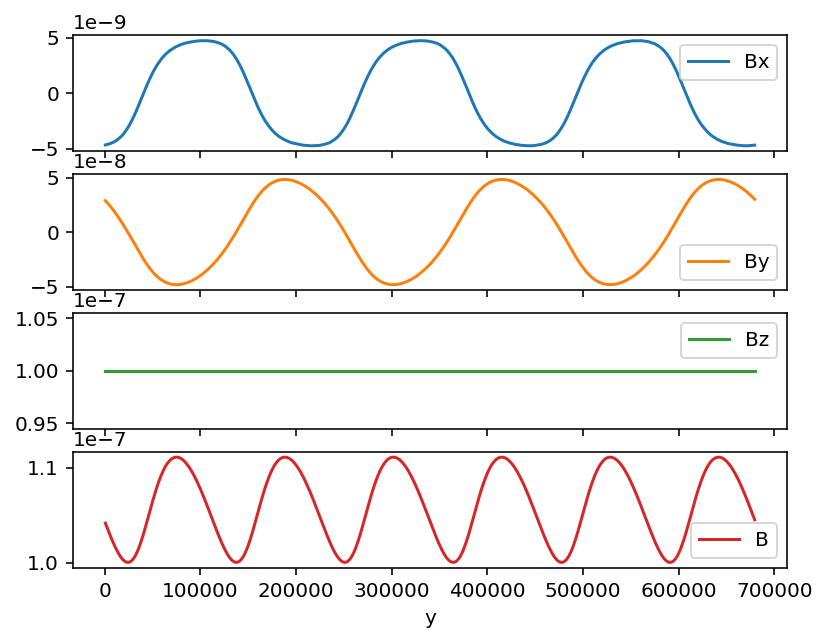

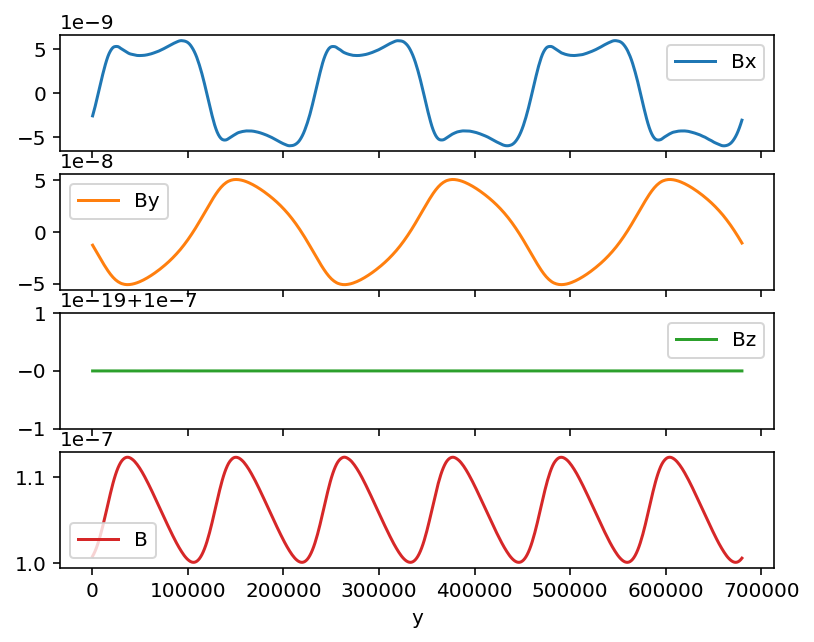

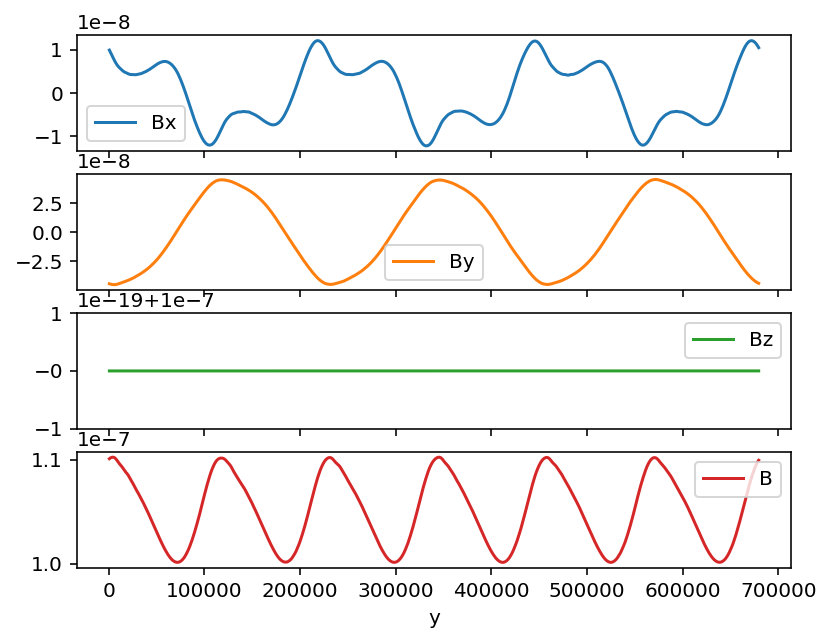

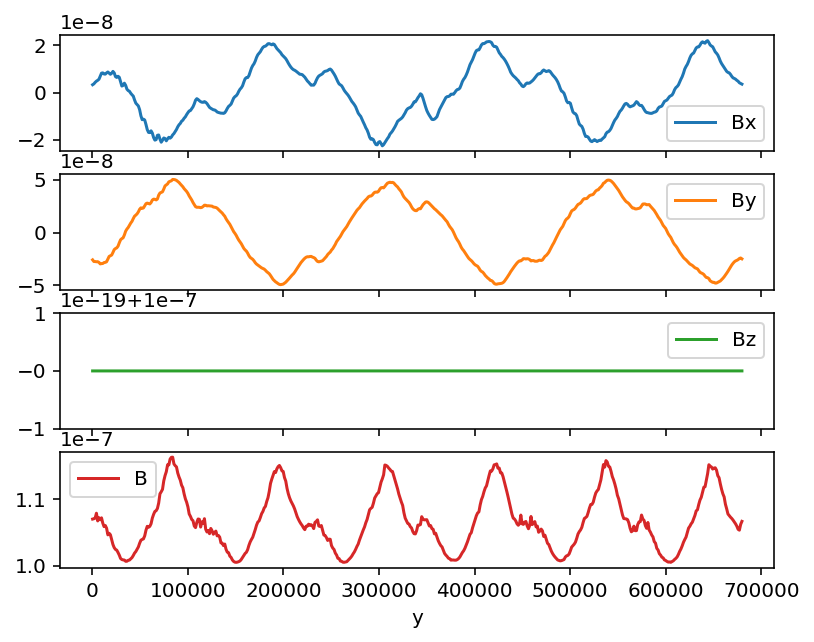

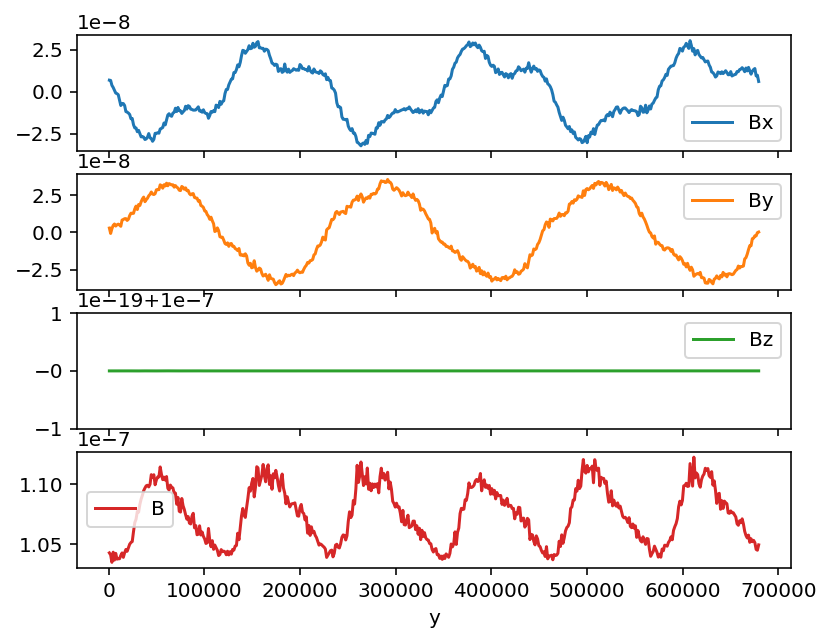

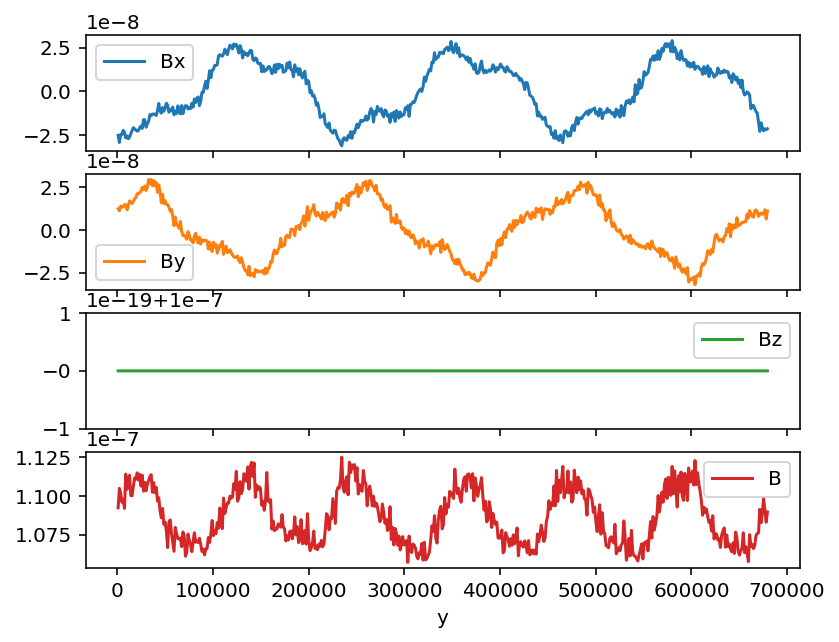

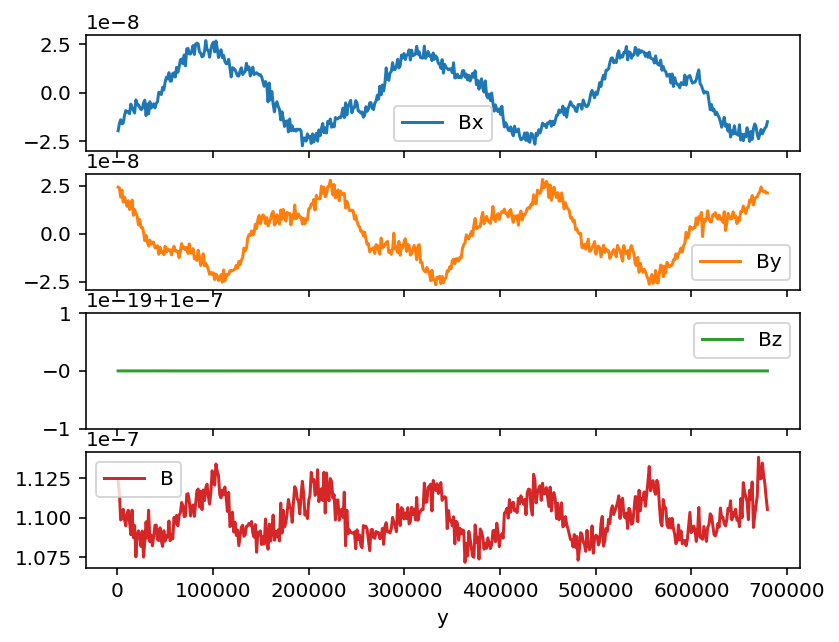

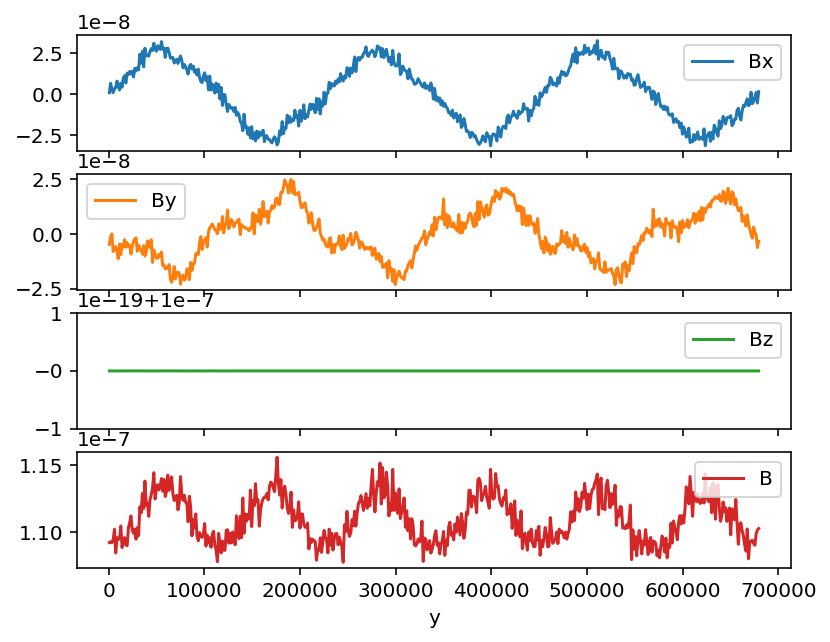

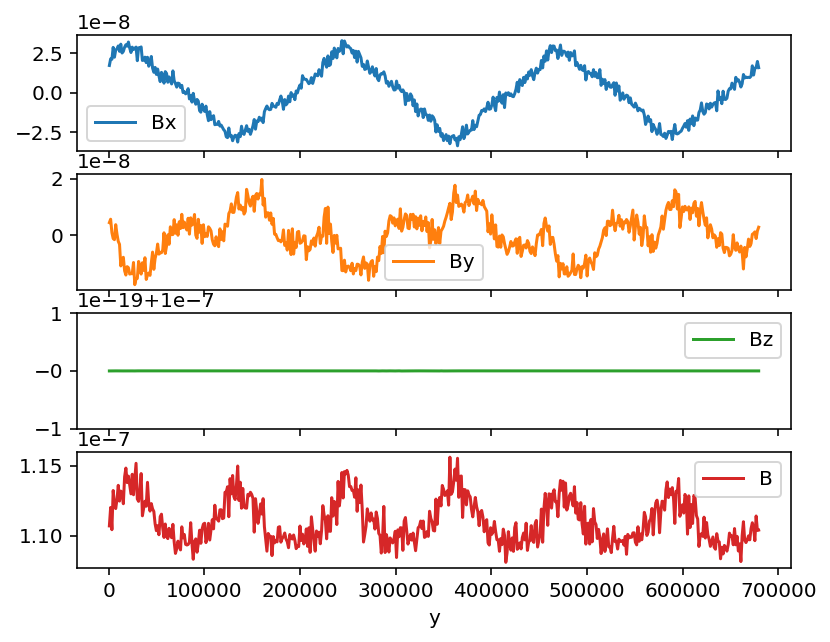

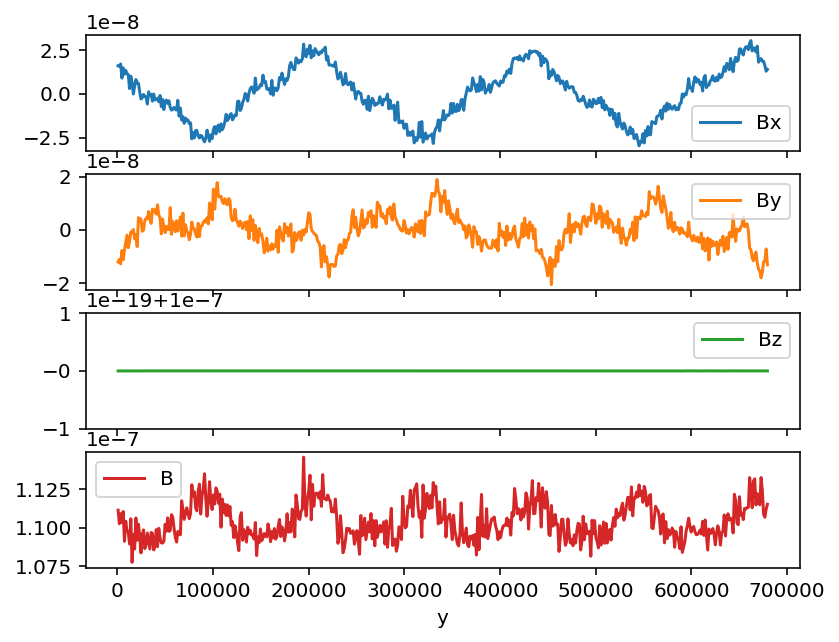

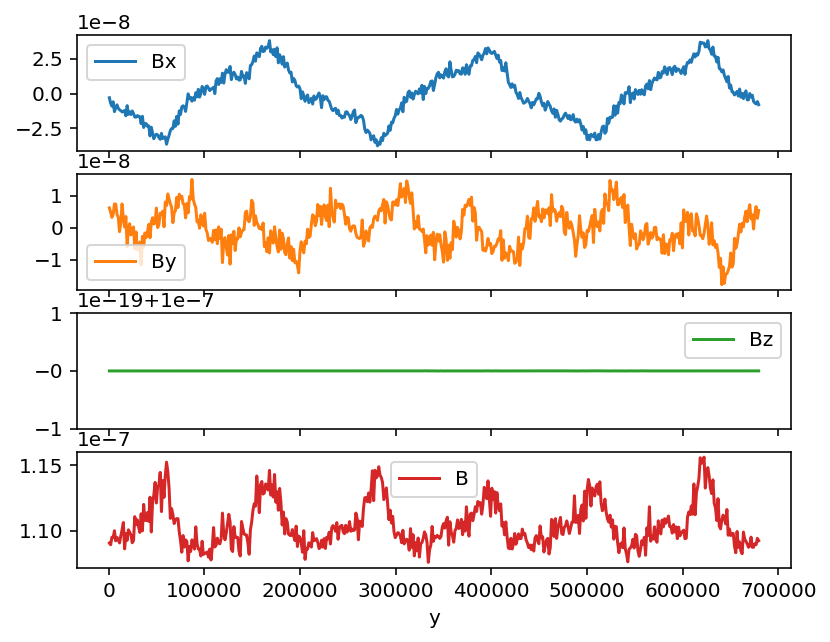

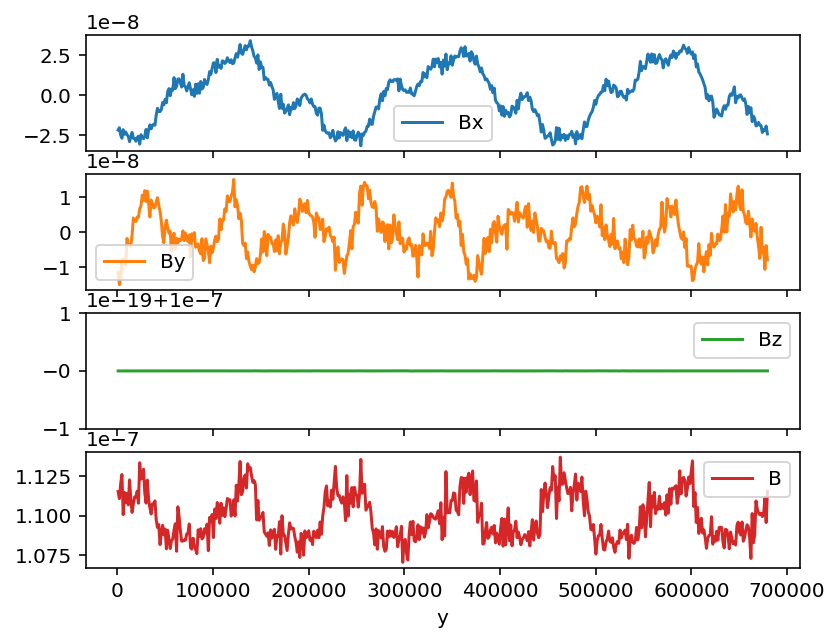

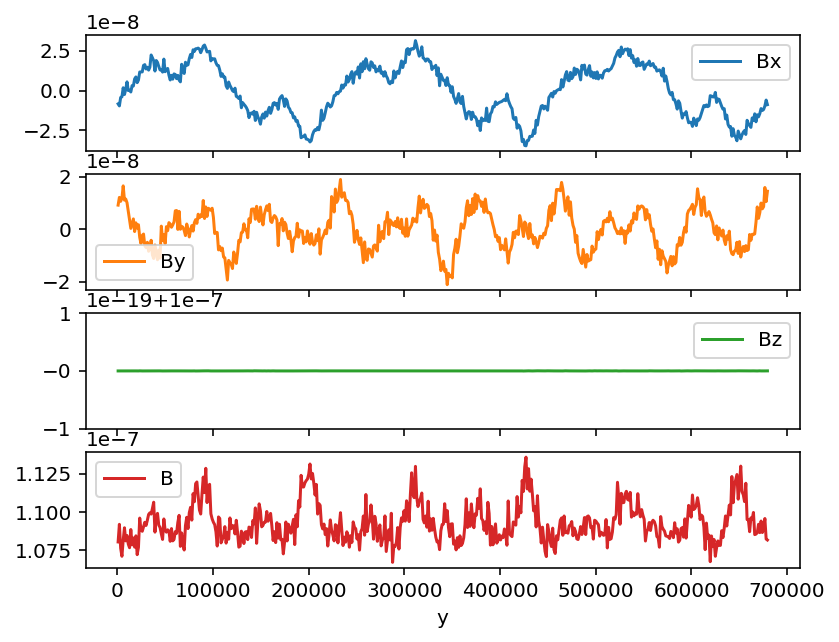

In [42]:
def plot_avg_ts(i):
    return plot_avg(ts[i])
    
time_widget = pn.widgets.IntSlider(name="Time", value=1, start=0, end=len(ts)-1)
bound_plot = pn.bind(plot_avg_ts, i=time_widget)

pn.Column(time_widget, bound_plot)

yt : [INFO     ] 2024-03-14 22:05:37,560 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-14 22:05:37,561 Parameters: domain_dimensions         = [256 512   1]
yt : [INFO     ] 2024-03-14 22:05:37,561 Parameters: domain_left_edge          = [-170050.98437063       0.               0.        ]
yt : [INFO     ] 2024-03-14 22:05:37,562 Parameters: domain_right_edge         = [1.70050984e+05 6.80203937e+05 1.00000000e+00]


AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

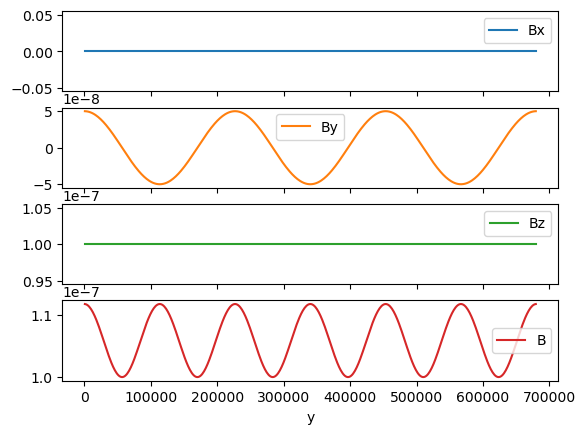

In [159]:
for ds in ts.piter():
    plot_avg(ds)

In [151]:
ds.print_stats()
print(ds.field_list)

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	   128	        131072	            51
----------------------------------------------
   	   128	        131072


t = 6.07305748e-01 code_time = 6.07305748e-01 s = 1.92443579e-08 yr

Smallest Cell:
	Width: 4.305e-20 Mpc
	Width: 4.305e-14 pc
	Width: 8.881e-09 AU
	Width: 1.329e+05 cm


[
    ('boxlib', 'Bx'),
    ('boxlib', 'By'),
    ('boxlib', 'Bz'),
    ('boxlib', 'Ex'),
    ('boxlib', 'Ey'),
    ('boxlib', 'Ez'),
    ('boxlib', 'jx'),
    ('boxlib', 'jy'),
    ('boxlib', 'jz')
]

In [ ]:
grid = ds.r[:,:,:]
obj = grid.to_xarray(fields=fields)

## Particles

In [ ]:
ts = yt.load('./diags/diag2??????')

In [ ]:
from rich import print

In [ ]:
def info(ts):
    ds = ts[0]
    print(ds.current_time)
    print(ds.field_list)

info(ts)

In [ ]:
fields = [
    ("ions", 'particle_momentum_x'),
]
direction = "z"


ps = "ions"
ds = ts[0]
# slc = yt.SlicePlot(ds, direction, fields, origin="native")
p = yt.ParticlePlot(
    ds,
    (ps, "particle_position_x"),
    (ps, "particle_position_y"),
    (ps, "particle_weight"),
)
p

### OpenPMD

In [ ]:
import openpmd_api as io

# example: data handling
import numpy as np

In [ ]:
openpmd_backend = "h5"
series = io.Series(f"diags/diag1/openpmd_%06T.{openpmd_backend}", io.Access.read_only)


In [ ]:
print("openPMD version: ", series.openPMD)

In [ ]:
list(series.iterations)
i = series.iterations[64]

In [ ]:
# record
B = i.meshes["B"]

In [ ]:
# record
B = i.meshes["B"]

# record components
B_x = B["x"]
B_y = B["y"]
B_z = B["z"]

B_x_data = B_x.load_chunk()
B_y_data = B_y.load_chunk()
B_z_data = B_z.load_chunk()
series.flush()

In [ ]:
plt.plot(B_x_data)
plt.plot(B_y_data)
plt.plot(B_z_data)